---

# Clustering Blobs with K-Means

In this notebook, we will demonstrate K-Means clustering using synthetic data generated with make_blobs. K-Means is an unsupervised algorithm that partitions data into k clusters by minimizing within-cluster variance. It assumes that clusters are spherical, equally sized, and separated by distance.

The algorithm works by:

- Initializing k centroids

- Assigning each point to the nearest centroid

- Recomputing centroids as the mean of assigned points

- Iterating until convergence

We'll generate 2D data with clearly separated clusters, apply K-Means, and visualize the clustering results, inertia, and silhouette score. The reason for using synthetic data in this case is that real-world data is often not cleanly separable in two dimensions without extensive PCA or other preprocessing.

---

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

---

Generate our synthetic data. We will choose 3 clusters to ensure that the data is somewht separable while still having small crossover to demonstrate how K means clustering categorizes results.

---

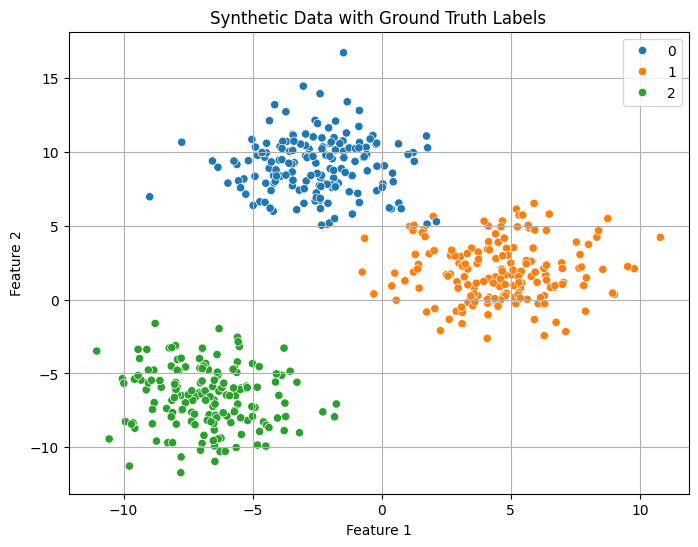

In [33]:
# Generate synthetic data: 500 samples, 3 clusters, 2D
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=2, random_state=42)

# Quick look
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_true, palette="tab10")
plt.title("Synthetic Data with Ground Truth Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

---

Next, train our clusterer with k = 3. We known the ideal value for k, but in the real-world we may have to do other analysis to determine the best value, such as the elbow method (discussed below).

---

In [34]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

---

Plot the result of our K means clustering! We can look at the inferences the model made and the centriods it settled on.

---

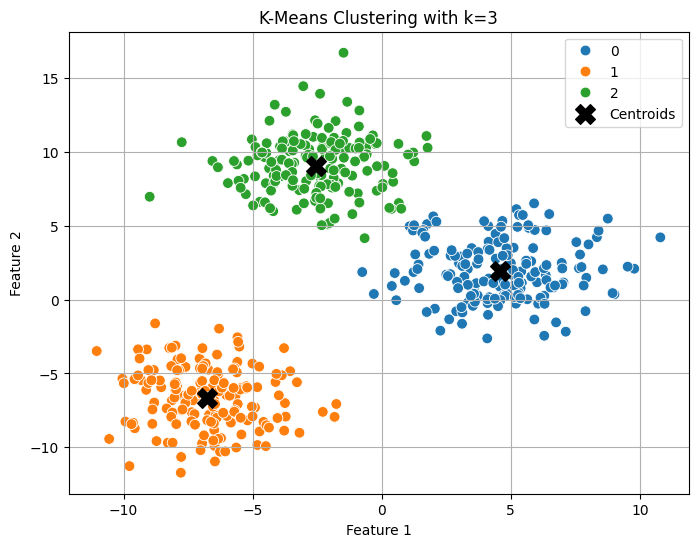

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="tab10", s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title(f"K-Means Clustering with k={k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

---

We can use the elbow method when we don't know the true K value to determine what an optimal clustering number might be. We graph inertia, the sum of squared distances between points, against the value we choose for K. The point in the graph where there is a sharp "elbow" indicates that an optimal value of K has been reached and further clustering isn't likely to be productive.

---

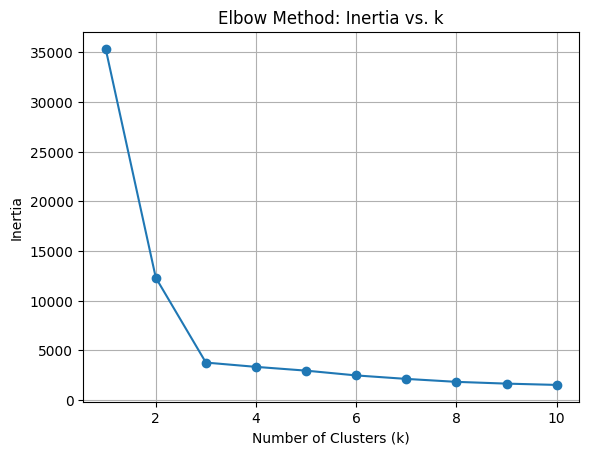

In [36]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method: Inertia vs. k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

---

We have confirmed what we already knew in this case: that 3 clusters is ideal! However, we can apply the elbow method when looking at much more complex real-world datasets to verify our methodology.

---